# Big Data Analysis 1
### Exercise: Data Analyze ping file in Jupyter

Now you should have all needed tools to make full analysis for a PING file. In this exercise we use a bit longer PING file with > 1 million rows. Even if the file is only 66MB, it can cause problems in docker container CLI operations (e.g. sed). If you are not able to run CLI commands inside container in your own computer, use ai.dclabra.fi environment. :) 


#### Step 1: Preprosess the data and read it to Pandas dataframe 
**Task 1.** Copy `/bda1/data/google_big.txt` to your working file

**Task 2.** Remove duplicate lines (indicated with DUP)
```
DUPLICATE AND DAMAGED PACKETS         top
       ping will report duplicate and damaged packets. Duplicate packets
       should never occur, and seem to be caused by inappropriate
       link-level retransmissions. Duplicates may occur in many
       situations and are rarely (if ever) a good sign, although the
       presence of low levels of duplicates may not always be cause for
       alarm.

       Damaged packets are obviously serious cause for alarm and often
       indicate broken hardware somewhere in the ping packet's path (in
       the network or in the hosts).
```

**Task 3.** Replace timeout lines with NaN (`Request timeout for icmp_seq xxx`)

**Task 4.** Remove first header line (`PING google.com (74.125.205.101): 56 data bytes`)

**Task 5.** Remove PING statistics from the end 
```
--- google.com ping statistics ---
1047670 packets transmitted, 981599 packets received, +2 duplicates, 6.3% packet loss
round-trip min/avg/max/stddev = -311.263/102.099/4834947.358/16183.947 ms
````
**Task 6.** Read ping times and NaNs to pandas dataframe `google_big`.

**Task 7.** Use `plot()` and `hist(bins=50)` to visualize `google_big` data.

**Task 8.** Print dataframe length.

**Task 9.** Print dataframe statistics with `describe()`. 

**Task 10.** Save dataframe min and max values to variables `google_big_min` and `google_big_max`. 




In [40]:
## Task 1-6
## Your code here
import pandas as pd
import numpy as np

!cp ../data/google_big.txt google_big.txt
dup = 'DUP'

a_file = open("google_big.txt", "r")
lines = a_file.readlines()
a_file.close()

new_file = open("google_big2.txt", "w")
for line in lines:
    if not(dup in line):
        new_file.write(line)
new_file.close()

!sed -i -e 's/Request timeout for icmp_seq.*/NaN/g' google_big2.txt
!sed -i '1d' google_big2.txt
!sed -i "$(( $(wc -l < google_big2.txt)-3 )),$ d" google_big2.txt

ping_data = !cat google_big2.txt
ping_list = list(ping_data)
google_big = pd.DataFrame(ping_data)
google_big.rename({0: 'X'}, axis=1, inplace=True)
google_big['Y'] =  google_big['X'].apply(lambda x: x[x.rfind('=')+1:-3] if "=" in x else 'NaN') 
google_big['Y'] = pd.to_numeric(google_big['Y'], errors = 'coerce')
google_big.head(25)

,X,Y
0,64 bytes from 74.125.205.101: icmp_seq=0 ttl=1...,29.519
1,64 bytes from 74.125.205.101: icmp_seq=1 ttl=1...,22.034
2,64 bytes from 74.125.205.101: icmp_seq=2 ttl=1...,22.955
3,64 bytes from 74.125.205.101: icmp_seq=3 ttl=1...,22.593
4,64 bytes from 74.125.205.101: icmp_seq=4 ttl=1...,24.818
5,64 bytes from 74.125.205.101: icmp_seq=5 ttl=1...,28.309
6,64 bytes from 74.125.205.101: icmp_seq=6 ttl=1...,21.774
7,64 bytes from 74.125.205.101: icmp_seq=7 ttl=1...,23.278
8,64 bytes from 74.125.205.101: icmp_seq=8 ttl=1...,20.909
9,64 bytes from 74.125.205.101: icmp_seq=9 ttl=1...,22.757


google_big min is: -311.26
google_big max is: 4834947.36
Dataframen pituus on 1047670


count    9.815990e+05
mean     1.020991e+02
std      1.618397e+04
min     -3.112630e+02
25%      2.279900e+01
50%      2.487500e+01
75%      4.124700e+01
max      4.834947e+06
Name: Y, dtype: float64

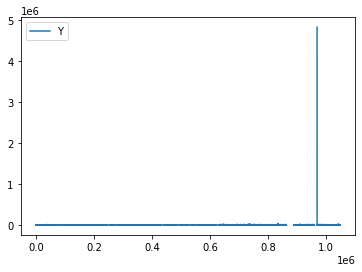

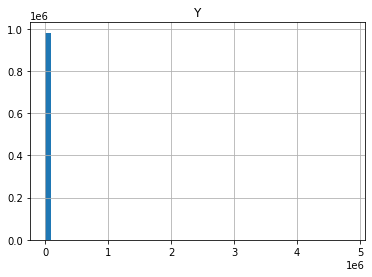

In [41]:
## Task 7-10
## Your code here
# Note 1. Round all results to 2 decimals
# Note 2. Use np.around() to avoid floating point number rounding problems
# see https://numpy.org/doc/stable/reference/generated/numpy.around.html

google_big.plot()
google_big.hist(bins=50)

google_big_min = np.around(np.min(google_big["Y"]), 2)
google_big_max = np.around(np.max(google_big["Y"]), 2)
print("google_big min is:", google_big_min)
print("google_big max is:", google_big_max)

print('Dataframen pituus on', len(google_big["Y"]))
google_big["Y"].describe()


#### Step 2: Erroneous data points

We are using PING to measure IP-packet round-trip-time to google server and back. So values should always be positive. And let's assume that also values > 10s are not correct. As we noticed in Task 10 there are data points < 0ms and > 10 000ms in the dataframe. Let's remove those line. 

***Task 11:*** Remove negative data points

***Task 12:*** Remove data points > 10s

**Task 13.** Use `plot()` and `hist(bins=50)` to visualize `google_big` data.

**Task 14.** Print dataframe length.
***Hint.*** *You should get* `google_big length is: 1047670`

**Task 15.** Print dataframe statistics with describe(). 

**Task 16.** Save dataframe min and max values to variables `google_big_min2` and `google_big_max2`. 



google_big length is: 1047629
google_big min2 is: 17.97
google_big max2 is: 5614.72


,Y
count,981558.000000
mean,47.531631
std,111.149551
min,17.973000
25%,22.799000
50%,24.875000
75%,41.246000
max,5614.719000


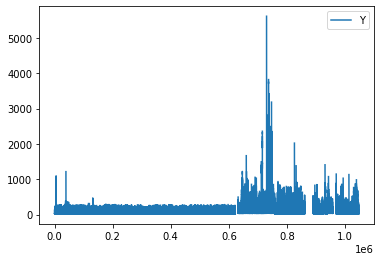

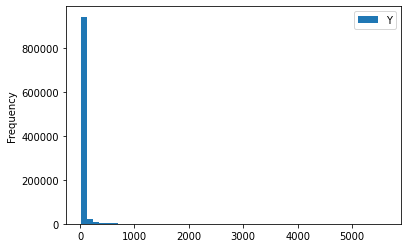

In [42]:
## Task 11-16
## Your code here
# Note 1. Round all results to 2 decimals
# Note 2. Use np.around() to avoid floating point number rounding problems
# see https://numpy.org/doc/stable/reference/generated/numpy.around.html
google_big.drop(google_big[ google_big['Y'] < 0 ].index, inplace=True)
google_big.drop(google_big[ google_big['Y'] > 10000 ].index, inplace=True)

google_big.plot() 
google_big.plot.hist(bins=50)

google_big_min2 = np.around(np.min(google_big["Y"]), 2)
google_big_max2 = np.around(np.max(google_big["Y"]), 2)

print('google_big length is:', len(google_big))
print("google_big min2 is:", google_big_min2)
print("google_big max2 is:", google_big_max2)

google_big.describe()

#### Step 3: Dataframe split to Wifi and LTE dataframes 

You should be able to see from the dataset that it consists of two different parts (i.e. Wifi part and LTE part). Do visual split to Wifi part and LTE part and calculate statistics for those.

***Task 17:*** Split data visually to Wifi dataset and LTE dataset

```
Hint1. There is ping timeout block, when connection is changed from Wifi to LTE.
Hint2. You can zoom plot image with command "plt.axis([x_min, x_max, y_min, y_max])"
```

***Task 18:*** Print dataframe statistics for both datasets

***Task 19:*** Use plot() and hist(bins=50) to visualize both datasets



Wifi
Count: 611728
Mean: 25.48
Std: 16.42
IQR: 2.44
Min: 17.97
Max: 1214.53
Median: 23.24
Availability: 0.98
LTE
Count: 369830
Mean: 84.01
Std: 173.81
IQR: 22.84
Min: 21.24
Max: 5614.72
Median: 45.2
Availability: 0.87


<AxesSubplot:title={'center':'LTE'}, ylabel='Frequency'>

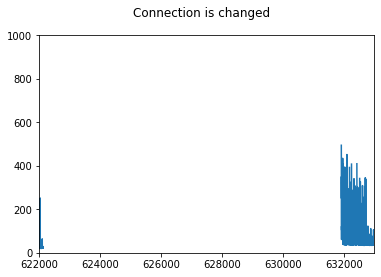

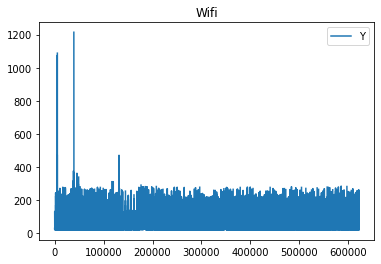

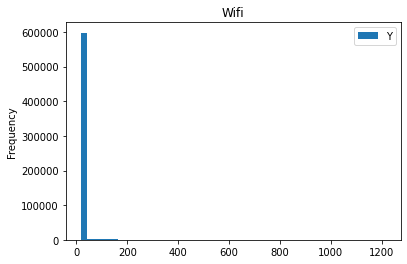

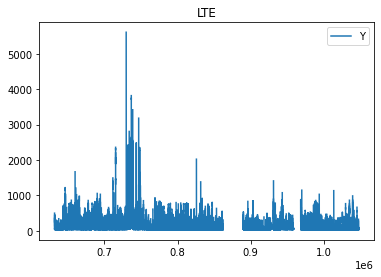

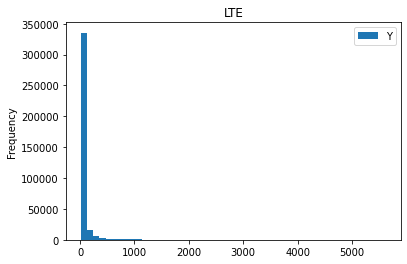

In [57]:
## Task 17-19
## Your code here

# Print dataframe statistics for both datasets
# Note 1. Round all results to 2 decimals
# Note 2. Use np.around() to avoid floating point number rounding problems
# see https://numpy.org/doc/stable/reference/generated/numpy.around.html

import matplotlib.pyplot as plt

lst = []
lst2 = []
successful_pings = 0
bad_pings = 0
all_pings = 0
successful_pings2 = 0
bad_pings2 = 0
all_pings2 = 0

fig = plt.figure()
plt.axis([622000, 633000, 0, 1000]) 
plt.plot(google_big.index, google_big["Y"])
fig.suptitle('Connection is changed') 

wifi_df = google_big[:622500]
lte_df = google_big[622500:]

google_wifi_count = np.around(wifi_df["Y"].count(), 2)
google_wifi_mean = np.around(np.mean(wifi_df["Y"]), 2)
google_wifi_std = np.around(wifi_df["Y"].std(), 2)
google_wifi_IQR = np.around(np.nanquantile(wifi_df["Y"], .75) - \
np.nanquantile(wifi_df["Y"], .25), 2)
google_wifi_min = np.around(np.min(wifi_df["Y"]), 2)
google_wifi_max = np.around(np.max(wifi_df["Y"]), 2)
google_wifi_median = np.around(np.nanmedian(wifi_df["Y"]), 2) 
    
lst = map(lambda x: x.startswith("64"), wifi_df['X'])

for i in lst:
    if i == True:
        successful_pings = successful_pings + 1
    else:
        bad_pings = bad_pings + 1

all_pings = successful_pings + bad_pings
google_wifi_availability = np.around(successful_pings/all_pings, 2)

google_lte_count = np.around(lte_df["Y"].count(), 2)
google_lte_mean = np.around(np.mean(lte_df["Y"]), 2)
google_lte_std = np.around(lte_df["Y"].std(), 2)
google_lte_IQR = np.around(np.nanquantile(lte_df["Y"], .75) - \
np.nanquantile(lte_df["Y"], .25), 2)
google_lte_min = np.around(np.min(lte_df["Y"]), 2)
google_lte_max = np.around(np.max(lte_df["Y"]), 2)
google_lte_median = np.around(np.nanmedian(lte_df["Y"]), 2)

lst2 = map(lambda x: x.startswith("64"), lte_df['X'])

for i in lst2:
    if i == True:
        successful_pings2 = successful_pings2 + 1
    else:
        bad_pings2 = bad_pings2 + 1

all_pings2 = successful_pings2 + bad_pings2
google_lte_availability = np.around(successful_pings2/all_pings2, 2)

print("Wifi")
print("Count:", google_wifi_count)
print("Mean:", google_wifi_mean)
print("Std:", google_wifi_std)
print("IQR:", google_wifi_IQR)
print("Min:", google_wifi_min)
print("Max:", google_wifi_max)
print("Median:", google_wifi_median)
print("Availability:", google_wifi_availability)

print("LTE")
print("Count:", google_lte_count)
print("Mean:", google_lte_mean)
print("Std:", google_lte_std)
print("IQR:", google_lte_IQR)
print("Min:", google_lte_min)
print("Max:", google_lte_max)
print("Median:", google_lte_median)
print("Availability:", google_lte_availability)

wifi_df.plot(title='Wifi') 
wifi_df.plot.hist(bins=50, title='Wifi')
                            
lte_df.plot(title='LTE') 
lte_df.plot.hist(bins=50, title='LTE')

### Reflection
Based on your results, compare Wifi dataset and LTE datasets. (Compare at least connection speed, connection availability and connection stability.) Which one is better?

Yhteyden nopeus on parempi LTE:llä. Saatavuus ja stabiilisuus on parempi wifi-yhteydellä.

### Check your answers by running following cell:

In [58]:
# Do not change this code!

import importlib
import bda1_analyze_check
importlib.reload(bda1_analyze_check)

print("Results:")
correct = bda1_analyze_check.check_analyze(google_big_min, google_big_max, google_big_min2, 
        google_big_max2,google_wifi_count, google_wifi_mean, google_wifi_std, google_wifi_IQR, 
        google_wifi_min, google_wifi_max, google_wifi_median, google_wifi_availability,
        google_lte_count, google_lte_mean, google_lte_std, google_lte_IQR, google_lte_min, 
        google_lte_max, google_lte_median, google_lte_availability)

print("Correct answers", correct, "/ 20.")


Results:
Correct answers 20 / 20.


### Nice work! 